NYC RESTUARANTS INSPECTIONS - ETL PROCESS

Setting the environment

In [3]:
!pip install googlemaps
!pip install pprintpp
!pip install tqdm
!pip install tabulate

In [4]:
import pyspark
from pyspark.sql import SparkSession
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sb
import numpy as np
import pprint
from tabulate import tabulate
from tqdm import tqdm_notebook as tqdm
import googlemaps
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

Function

In [6]:
def display_all(df):
     
    header_fields = [] 
    head_list = ds.dtypes=="float64"
    header_fields = df.columns[head_list].tolist()
      
    print(tabulate(df.describe(),headers=header_fields,tablefmt="pretty"))
#---------------------------------------------------------------------------------------------------------------------

def create_dim_time (start_date, end_date):
    
    df = pd.DataFrame({"id_time": pd.date_range(start_date, end_date)})
    df["day"] = df.id_time.dt.day
    df["day_name"] = df.id_time.dt.day_name()
    df["week"] = df.id_time.dt.weekofyear
    df["month"] = df.id_time.dt.month
    df["month_name"] = df.id_time.dt.month_name()
    df["quarter"] = df.id_time.dt.quarter
    df["year"] = df.id_time.dt.year
    return df

Set the nyc_restaurant_inspection_results table into a spark dataframe

In [8]:
df = sqlContext.table("nyc_restaurant_inspection_results")
display(df)

camis,restaurant_name,borough,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,grade,grade_date,record_date,inspection_type,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta
50017690,LA ESTRELLA DEL CASTILLO RESTAURANT,Brooklyn,948,NOSTRAND AVENUE,11225,7183633387,"Latin (Cuban, Dominican, Puerto Rican, South & Central American)",06/21/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41º F (smoked fish and reduced oxygen packaged foods above 38 ºF) except during necessary preparation.,Y,10,null,null,08/03/2020,Cycle Inspection / Initial Inspection,40.665691233343,-73.950901784124,309,35,32100,3034166,3012960047,BK63
50002292,THE BARONESS BAR,Queens,41-26,CRESCENT STREET,11101,7187845065,Hamburgers,04/24/2019,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.,N,13,A,04/24/2019,08/03/2020,Cycle Inspection / Re-inspection,40.75180294914,-73.939501338959,401,26,3300,4005004,4004140039,QN68
41619148,LA POLLERA COLORADA II,Queens,82-13,NORTHERN BOULEVARD,11372,7184246531,"Latin (Cuban, Dominican, Puerto Rican, South & Central American)",03/06/2020,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, contaminated, cross-contaminated, or not discarded in accordance with HACCP plan.",Y,41,null,null,08/03/2020,Inter-Agency Task Force / Initial Inspection,40.75558212959,-73.885149926454,403,25,32700,4034495,4014120043,QN28
50059371,MOTEL MORRIS,Manhattan,132,7 AVENUE,10011,5164579749,American,04/02/2019,Violations were cited in the following area(s).,06C,"Food not protected from potential source of contamination during storage, preparation, transportation, display or service.",Y,19,null,null,08/03/2020,Cycle Inspection / Initial Inspection,40.740966091414,-73.997932223491,104,3,8100,1013853,1007670043,MN13
50036530,CAFFE VITA,Manhattan,124,LUDLOW STREET,10002,2122608482,Café/Coffee/Tea,10/04/2016,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.",Y,12,null,null,08/03/2020,Cycle Inspection / Initial Inspection,40.719718307529,-73.988524446734,103,1,1800,1005328,1004100044,MN27
41056164,CACIO & PEPE,Manhattan,182,2 AVENUE,10003,2125055931,Italian,08/08/2018,Violations were cited in the following area(s).,06C,"Food not protected from potential source of contamination during storage, preparation, transportation, display or service.",Y,32,null,null,08/03/2020,Cycle Inspection / Initial Inspection,40.730688875082,-73.986133970566,103,2,4000,1006473,1004530005,MN22
50059886,SABBA'S CHICKEN,Bronx,1504,WESTCHESTER AVENUE,10472,7184849105,American,10/03/2018,Violations were cited in the following area(s).,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",N,5,A,10/03/2018,08/03/2020,Cycle Inspection / Initial Inspection,40.828518474267,-73.879820171947,209,17,5002,2023832,2037390037,BX55
50063229,LA PARRANDA BAR RESTAURANT,Bronx,2712,WHITE PLAINS ROAD,10467,7186841119,Spanish,04/06/2018,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.",Y,20,null,null,08/03/2020,Pre-permit (Operational) / Initial Inspection,40.865693182355,-73.867337161105,211,15,33800,2053552,2045090005,BX07
40379746,RESTUARANT NIPPON,Manhattan,155,EAST 52 STREET,10022,2126885941,Japanese,06/26/2019,Violations were cited in the following area(s).,10F,"Non-fo

In [9]:
%sql
select count(*) from nyc_restaurant_inspection_results
--all records imported

count(1)
400147


Copy the spark dataframe into a Pandas dataframe

In [11]:
ds = df.select("*").toPandas()

Dataset structure and related informations

In [13]:
print("Shape's dataset:", ds.shape)

Shape's dataset: (400147, 26)

In [14]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400147 entries, 0 to 400146
Data columns (total 26 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 camis 400147 non-null int32 
 1 restaurant_name 399784 non-null object 
 2 borough 400147 non-null object 
 3 building 399266 non-null object 
 4 street 400147 non-null object 
 5 zipcode 393475 non-null object 
 6 phone 400128 non-null object 
 7 cuisine_description 400147 non-null object 
 8 inspection_date 400147 non-null object 
 9 action 398273 non-null object 
 10 violation_code 394017 non-null object 
 11 violation_description 390642 non-null object 
 12 critical_flag 390642 non-null object 
 13 score 382894 non-null float64
 14 grade 202637 non-null object 
 15 grade_date 200033 non-null object 
 16 record_date 400147 non-null object 
 17 inspection_type 398273 non-null object 
 18 latitude 398554 non-null float64
 19 longitude 398554 non-null float64
 20 community_board 391940 non-null float64
 21 council_district 391940 non-null float64
 22 census_tract 391940 non-null float64
 23 bin 390163 non-null float64
 24 bbl 398554 non-null float64
 25 nta 391940 non-null object 
dtypes: float64(8), int32(1), object(17)
memory usage: 77.8+ MB

In [15]:
display_all(ds)

+-------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
 | | score | latitude | longitude | community_board | council_district | census_tract | bin | bbl |
+-------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
 count | 400147.0 | 382894.0 | 398554.0 | 398554.0 | 391940.0 | 391940.0 | 391940.0 | 390163.0 | 398554.0 |
 mean | 46218018.93843013 | 20.319890100132152 | 40.05263058568721 | -72.71626209306814 | 248.35210491401745 | 20.047941011379294 | 28699.936982701434 | 2508986.9520508097 | 2395187898.43013 |
 std | 4393381.32326909 | 14.843479440801715 | 5.2034351301985415 | 9.44642841993998 | 130.420404850296 | 15.823904783821119 | 30485.716280306246 | 1349306.7269412968 | 1344586558.3310862 |
 min | 30112340.0 | -1.0 | 0.0 | -74.249101331725 | 101.0 | 1.0 | 100.0 | 1000000.0 | 1.0 |
 25% | 41403924.0 | 11.0 | 40.68543887714125 | -73.989236057883 | 105.0 | 4.0 | 7800.0 | 1042507.0 | 1010360057.0 |
 50% | 50008918.0 | 15.0 | 40.73202641373 | -73.958162232301 | 301.0 | 20.0 | 16100.0 | 3008048.0 | 3001660029.0 |
 75% | 50059422.0 | 26.0 | 40.761532151222504 | -73.898788219384 | 401.0 | 34.0 | 40300.0 | 4001953.0 | 4001350030.0 |
 max | 50105574.0 | 164.0 | 40.912822326386 | 0.0 | 503.0 | 51.0 | 162100.0 | 5799501.0 | 5270000501.0 |
+-------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+

NULL values at first glance

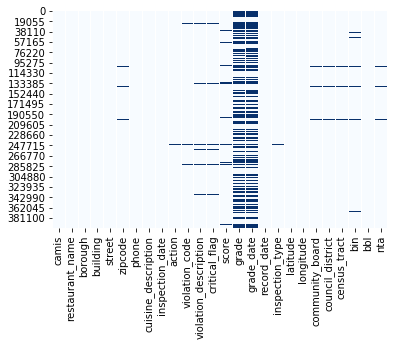

In [17]:
sb.heatmap(ds.isnull(), cmap="Blues",cbar = False)

Looking for duplicates

In [19]:
dupl = ds.duplicated().sum()
ds.drop_duplicates(keep=False,inplace=True)
ds.reset_index(drop = True)
print('Records duplicated: ' + str(dupl))

Records duplicated: 1

Dropping unuseful columns

In [21]:
ds = ds.drop(columns=['record_date', 'community_board','council_district','census_tract','bin','bbl','nta','grade_date'])
ds.head()

,camis,restaurant_name,borough,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,grade,inspection_type,latitude,longitude
0,50017690,LA ESTRELLA DEL CASTILLO RESTAURANT,Brooklyn,948,NOSTRAND AVENUE,11225,7183633387,"Latin (Cuban, Dominican, Puerto Rican, South &...",06/21/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41º F (smoked fish a...,Y,10.0,None,Cycle Inspection / Initial Inspection,40.665691,-73.950902
1,50002292,THE BARONESS BAR,Queens,41-26,CRESCENT STREET,11101,7187845065,Hamburgers,04/24/2019,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,13.0,A,Cycle Inspection / Re-inspection,40.751803,-73.939501
2,41619148,LA POLLERA COLORADA II,Queens,82-13,NORTHERN BOULEVARD,11372,7184246531,"Latin (Cuban, Dominican, Puerto Rican, South &...",03/06/2020,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Y,41.0,None,Inter-Agency Task Force / Initial Inspection,40.755582,-73.885150
3,50059371,MOTEL MORRIS,Manhattan,132,7 AVENUE,10011,5164579749,American,04/02/2019,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Y,19.0,None,Cycle Inspection / Initial Inspection,40.740966,-73.997932
4,50036530,CAFFE VITA,Manhattan,124,LUDLOW STREET,10002,2122608482,Café/Coffee/Tea,10/04/2016,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,12.0,None,Cycle Inspection / Initial Inspection,40.719718,-73.988524


### Dimension: TIME

In [23]:
%sql
select count(1) as inspections,right(inspection_date,4) as year
from nyc_restaurant_inspection_results
where inspection_date <> '01/01/1900' and right(inspection_date,4) <> '2020'
group by right(inspection_date,4)
order by 2

inspections,year
3,2013
12,2014
94,2015
17866,2016
78870,2017
120883,2018
147746,2019


In [24]:
ds['inspection_date'] = pd.to_datetime(ds['inspection_date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
ds['inspection_date'] = pd.to_datetime(ds['inspection_date'], format='%Y-%m-%d')
dim_time = create_dim_time ('01/01/1900', '31/12/2020')
dim_time['id_time'] = dim_time['id_time'].dt.date

In [25]:
display(dim_time)

id_time,day,day_name,week,month,month_name,quarter,year
1900-01-01,1,Monday,1,1,January,1,1900
1900-01-02,2,Tuesday,1,1,January,1,1900
1900-01-03,3,Wednesday,1,1,January,1,1900
1900-01-04,4,Thursday,1,1,January,1,1900
1900-01-05,5,Friday,1,1,January,1,1900
1900-01-06,6,Saturday,1,1,January,1,1900
1900-01-07,7,Sunday,1,1,January,1,1900
1900-01-08,8,Monday,2,1,January,1,1900
1900-01-09,9,Tuesday,2,1,January,1,1900
1900-01-10,10,Wednesday,2,1,January,1,1900


### Dimension: BOROUGH
• 1 = MANHATTAN
• 2 = BRONX
• 3 = BROOKLYN
• 4 = QUEENS
• 5 = STATEN ISLAND
• 0 = N/A

In [27]:
ds['borough'] = ds['borough'].replace({'0':'N/A'})
ds['id_borough'] = ds['borough'].replace({'N/A':0,'Manhattan':1, 'Bronx':2,'Brooklyn':3,'Queens':4,'Staten Island':5})
dim_borough = ds[['id_borough','borough']].drop_duplicates()
display(dim_borough)

id_borough,borough
3,Brooklyn
4,Queens
1,Manhattan
2,Bronx
5,Staten Island
0,N/A


### Dimension: CUISINE
How many kinds of cuisines are in New York? Some of the restaurants of the datasets could went out of business in the meanwhile

In [29]:
%sql
select cuisine_description, count(distinct camis) as total_restaurants  
from nyc_restaurant_inspection_results 
group by cuisine_description

cuisine_description,total_restaurants
Pancakes/Waffles,18
Chinese/Japanese,43
Mexican,1011
Jewish/Kosher,336
Bakery,771
Turkish,72
Scandinavian,7
Armenian,25
Hotdogs,29
Ethiopian,15


In [30]:
le = LabelEncoder()
ds['id_cuisine'] = le.fit_transform(ds['cuisine_description'].values)
dim_cuisine = ds[['id_cuisine','cuisine_description']].drop_duplicates()
display(dim_cuisine)

id_cuisine,cuisine_description
51,"Latin (Cuban, Dominican, Puerto Rican, South & Central American)"
37,Hamburgers
2,American
13,Café/Coffee/Tea
46,Italian
76,Spanish
47,Japanese
63,Pizza/Italian
50,Korean
17,Chicken


### Dimension: CRITICAL_FLAG

Data dictionary mension three type of values:

• Critical

• Not Critical

• Not Applicable

Critical violations are those most likely to contribute to foodborne illness

In [32]:
%sql
select distinct critical_flag from nyc_restaurant_inspection_results

critical_flag
null
Y
N


In [33]:
ds['critical_flag'] = ds['critical_flag'].replace({None:'N/A'})
le = LabelEncoder()
ds['id_critical_flag'] = le.fit_transform(ds['critical_flag'].values)
dim_critical_flag = ds[['id_critical_flag','critical_flag']].drop_duplicates()
dim_critical_flag['critical_flag_description'] = dim_critical_flag['critical_flag'].replace({'Y':'Critical','N':'Not Critical', 'N/A':'Not Applicable'})
display(dim_critical_flag)

id_critical_flag,critical_flag,critical_flag_description
2,Y,Critical
0,N,Not Critical
1,N/A,Not Applicable


### Dimension: VIOLATION
There are some codes that have no description and they could be gathered in the new category "Others"

In [35]:
%sql
select * 
from
   (
    select count(violation_description) as total,right(inspection_date,4) as year,violation_description
    from nyc_restaurant_inspection_results 
    where violation_code is not null and violation_description is not null
    group by violation_description,right(inspection_date,4)
    )
where total <> 0

total,year,violation_description
34,2017,"Food, food preparation area, food storage area, area used by employees or patrons, contaminated by sewage or liquid waste."
272,2019,Food prepared from ingredients at ambient temperature not cooled to 41º F or below within 4 hours.
22,2016,"Lighting inadequate; permanent lighting not provided in food preparation areas, ware washing areas, and storage rooms."
2,2015,"Appropriately scaled metal stem-type thermometer or thermocouple not provided or used to evaluate temperatures of potentially hazardous foods during cooking, cooling, reheating and holding."
1,2014,Cold food item held above 41º F (smoked fish and reduced oxygen packaged foods above 38 ºF) except during necessary preparation.
595,2020,Food contact surface not properly maintained.
629,2020,Live roaches present in facility's food and/or non-food areas.
84,2020,"Nuisance created or allowed to exist. Facility not free from unsafe, hazardous, offensive or annoying conditions."
1,2014,"Smoke free workplace smoking policy inadequate, not posted, not provided to employees."
5445,2017,"Food not protected from potential source of contamination during storage, preparation, transportation, display or service."


In [36]:
%sql
select violation_code,violation_description,count(1) as num
from nyc_restaurant_inspection_results 
where violation_code is not null and violation_description is null
group by violation_code,violation_description

violation_code,violation_description,num
15F2,null,53
15E3,null,33
17A1,null,1
19A1,null,1
15F7,null,160
15F8,null,21
15F1,null,106
15G7,null,1
17A3,null,1
15E2,null,147


In [37]:
list_code = sqlContext.sql('select distinct violation_code,violation_description from nyc_restaurant_inspection_results where violation_code is not null and violation_description is null')

for c in list_code.rdd.collect():
    ds['violation_code'] = ds['violation_code'].replace({c.violation_code:'N/D'})
    
ds['violation_code'] = ds['violation_code'].replace({None:'--'})
le = LabelEncoder()
ds['id_violation_code'] = le.fit_transform(ds['violation_code'].values)
dim_violation= ds[['id_violation_code','violation_code','violation_description']].drop_duplicates()
dim_violation['violation_description'] = np.where(dim_violation['violation_code'] == 'N/D', 'Other violations',dim_violation['violation_description'] )
display(dim_violation)

id_violation_code,violation_code,violation_description
7,02G,Cold food item held above 41º F (smoked fish and reduced oxygen packaged foods above 38 ºF) except during necessary preparation.
50,08A,Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.
25,04H,"Raw, cooked or prepared food is adulterated, contaminated, cross-contaminated, or not discarded in accordance with HACCP plan."
42,06C,"Food not protected from potential source of contamination during storage, preparation, transportation, display or service."
43,06D,"Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred."
61,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit."
18,04A,Food Protection Certificate not held by supervisor of food operations.
63,10H,Proper sanitization not provided for utensil ware washing operation.
29,04L,Evidence of mice or live mice present in facility's food and/or non-food areas.
60,10E,Accurate thermometer not provided in refrigerated or hot holding equipment.


### Dimension: GEOGRAPHY

In [39]:
%sql
select *
from nyc_restaurant_inspection_results 
where zipcode is null or (latitude = 0 or longitude = 0) or (latitude is null or longitude is null)

camis,restaurant_name,borough,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,grade,grade_date,record_date,inspection_type,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta
40788471,STARBUCKS,Manhattan,30,ROCKFEELLER PLAZA,null,2125860914,Café/Coffee/Tea,07/19/2017,Violations were cited in the following area(s).,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",N,17,null,null,08/03/2020,Cycle Inspection / Initial Inspection,0.0,0.0,null,null,null,null,1,null
41294017,DUKE'S,Manhattan,1596 1598,2ND AVENUE,null,2127172020,American,10/08/2019,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.",Y,12,A,10/08/2019,08/03/2020,Cycle Inspection / Re-inspection,0.0,0.0,null,null,null,null,1,null
41680485,FLAMINGO RESTAURANT AND MANTRA LOUNGE,Queens,1200406,ROCKAWAY BLVD,null,7188351000,Caribbean,12/03/2018,Violations were cited in the following area(s).,06C,"Food not protected from potential source of contamination during storage, preparation, transportation, display or service.",Y,12,A,12/03/2018,08/03/2020,Cycle Inspection / Initial Inspection,0.0,0.0,null,null,null,null,4,null
50092870,PAPA THAI,Manhattan,2115,FREDERICK DOUGLASS BOULEVARD,null,2128661857,Thai,08/27/2019,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained; anti-siphonage or backflow prevention device not provided where required; equipment or floor not properly drained; sewage disposal system in disrepair or not functioning properly.,N,26,null,null,08/03/2020,Pre-permit (Operational) / Initial Inspection,0.0,0.0,null,null,null,null,1,null
41395402,CITI FIELD BLUE SMOKE/STAND 139,Queens,000,126TH ST & ROOSEVELT AVENUE,null,7185958100,American,06/05/2018,Violations were cited in the following area(s).,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",N,2,A,06/05/2018,08/03/2020,Cycle Inspection / Initial Inspection,0.0,0.0,null,null,null,null,4,null
41337804,JUST LORRAINE'S PLACE,Manhattan,2247,ADAM CLAYTON POWELL BOULEVARD,null,2122340720,American,04/20/2017,Violations were cited in the following area(s).,06C,"Food not protected from potential source of contamination during storage, preparation, transportation, display or service.",Y,12,A,04/20/2017,08/03/2020,Cycle Inspection / Re-inspection,0.0,0.0,null,null,null,null,1,null
41521287,WEST NEW MALAYSIA RESTAURANT,Manhattan,4648,BOWERY,null,2129640284,Asian,12/11/2018,Violations were cited in the following area(s).,06C,"Food not protected from potential source of contamination during storage, preparation, transportation, display or service.",Y,10,A,12/11/2018,08/03/2020,Cycle Inspection / Initial Inspection,0.0,0.0,null,null,null,null,1,null
50078965,OCEANVIEW BITES,Brooklyn,BOARDWALK,AT WEST 8TH STREET,11224,7187411426,American,06/15/2019,Violations were cited in the following area(s).,10I,"Single service item reused, improperly stored, dispensed; not used when required.",N,9,A,06/15/2019,08/03/2020,Pre-permit (Operational) / Initial Inspection,null,null,null,null,null,null,null,null
41372918,DONNYBROOK,Manhattan,3739,CLINTON STREET,null,2122287733,Irish,05/05/2016,Violations were cited in the following area(s).,10I,"Single service item reused, improperly stored, dispensed; not used when required.",N,16,null,null,08/03/2020,Cycle Inspection / Initial Inspection,0.0,0.0,null,nul

Impute the missing value of the zip code / lat = 0 / long =0 using the google maps API that, given a street address, return all informartion available concerning that address

In [41]:
gmaps = googlemaps.Client(key='<key>')

Example of the json file returned by the google Geocoding API

In [43]:
address = 'ROCKFEELLER PLAZA, New York, NY'
result = gmaps.geocode(address)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(result)

[ { 'address_components': [ { 'long_name': '45',
 'short_name': '45',
 'types': ['street_number']},
 { 'long_name': 'Rockefeller Plaza',
 'short_name': 'Rockefeller Plaza',
 'types': ['route']},
 { 'long_name': 'Manhattan',
 'short_name': 'Manhattan',
 'types': [ 'political',
 'sublocality',
 'sublocality_level_1']},
 { 'long_name': 'New York',
 'short_name': 'New York',
 'types': ['locality', 'political']},
 { 'long_name': 'New York County',
 'short_name': 'New York County',
 'types': [ 'administrative_area_level_2',
 'political']},
 { 'long_name': 'New York',
 'short_name': 'NY',
 'types': [ 'administrative_area_level_1',
 'political']},
 { 'long_name': 'United States',
 'short_name': 'US',
 'types': ['country', 'political']},
 { 'long_name': '10111',
 'short_name': '10111',
 'types': ['postal_code']}],
 'formatted_address': '45 Rockefeller Plaza, New York, NY 10111, USA',
 'geometry': { 'location': {'lat': 40.7587402, 'lng': -73.9786736},
 'location_type': 'ROOFTOP',
 'viewport': { 'northeast': { 'lat': 40.76008918029149,
 'lng': -73.9773246197085},
 'southwest': { 'lat': 40.7573912197085,
 'lng': -73.9800225802915}}},
 'partial_match': True,
 'place_id': 'ChIJ9U1mz_5YwokRosza1aAk0jM',
 'plus_code': { 'compound_code': 'Q25C+FG New York, NY, USA',
 'global_code': '87G8Q25C+FG'},
 'types': ['establishment', 'point_of_interest', 'tourist_attraction']}]

In [44]:
for index, row in ds.iterrows():
    if (row['latitude'] == 0 and  row['longitude'] == 0) or (row['latitude'] is None or row['longitude'] is None) or (row['zipcode'] is None) :
      address = row['street'] + ', New York, NY'
      result = gmaps.geocode(address)
      ds.loc[index, 'longitude'] = result[0]["geometry"]["location"]["lng"]
      ds.loc[index, 'latitude'] = result[0]["geometry"]["location"]["lat"]
      r = result[0]["address_components"]
      for i in r:
        if i["types"] == ['postal_code']:
           ds.loc[index, 'zipcode'] = i["long_name"]

In [45]:
ds['coordinates'] = ds['latitude'].astype(str) + ds['longitude'].astype(str)

In [46]:
le = LabelEncoder()
ds['id_geography'] = le.fit_transform(ds['coordinates'].values)
dim_geography = ds[['id_geography','id_borough','zipcode','latitude','longitude']].drop_duplicates()
display(dim_geography)

id_geography,id_borough,zipcode,latitude,longitude
4052,3,11225,40.665691233343,-73.950901784124
14837,4,11101,40.75180294914,-73.939501338959
15571,4,11372,40.75558212959,-73.885149926454
12718,1,10011,40.740966091414,-73.997932223491
9620,1,10002,40.719718307529,-73.988524446734
11455,1,10003,40.730688875082,-73.986133970566
20961,2,10472,40.828518474267,-73.879820171947
22422,2,10467,40.865693182355,-73.867337161105
16018,1,10022,40.757510580115,-73.970881478995
16299,1,10111,40.7587402,-73.9786736


In [47]:
display(dim_geography)

id_geography,id_borough,zipcode,latitude,longitude
4052,3,11225,40.665691233343,-73.950901784124
14837,4,11101,40.75180294914,-73.939501338959
15571,4,11372,40.75558212959,-73.885149926454
12718,1,10011,40.740966091414,-73.997932223491
9620,1,10002,40.719718307529,-73.988524446734
11455,1,10003,40.730688875082,-73.986133970566
20961,2,10472,40.828518474267,-73.879820171947
22422,2,10467,40.865693182355,-73.867337161105
16018,1,10022,40.757510580115,-73.970881478995
16299,1,10111,40.7587402,-73.9786736


### Dimension: GRADE

A grade is assigned only when specific conditions occurs so null value are filled with N/A

• N= Not Yet Graded
• A = Grade A
• B = Grade B
• C = Grade C
• G = Grade G
• Z = Grade Pending
• P=Grade Pending issued on re-opening following an initial inspection that resulted in a closure

In [49]:
%sql
select * 
from  nyc_restaurant_inspection_results 
where grade is null

camis,restaurant_name,borough,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,grade,grade_date,record_date,inspection_type,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta
50017690,LA ESTRELLA DEL CASTILLO RESTAURANT,Brooklyn,948,NOSTRAND AVENUE,11225,7183633387,"Latin (Cuban, Dominican, Puerto Rican, South & Central American)",06/21/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41º F (smoked fish and reduced oxygen packaged foods above 38 ºF) except during necessary preparation.,Y,10,null,null,08/03/2020,Cycle Inspection / Initial Inspection,40.665691233343,-73.950901784124,309,35,32100,3034166,3012960047,BK63
41619148,LA POLLERA COLORADA II,Queens,82-13,NORTHERN BOULEVARD,11372,7184246531,"Latin (Cuban, Dominican, Puerto Rican, South & Central American)",03/06/2020,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, contaminated, cross-contaminated, or not discarded in accordance with HACCP plan.",Y,41,null,null,08/03/2020,Inter-Agency Task Force / Initial Inspection,40.75558212959,-73.885149926454,403,25,32700,4034495,4014120043,QN28
50059371,MOTEL MORRIS,Manhattan,132,7 AVENUE,10011,5164579749,American,04/02/2019,Violations were cited in the following area(s).,06C,"Food not protected from potential source of contamination during storage, preparation, transportation, display or service.",Y,19,null,null,08/03/2020,Cycle Inspection / Initial Inspection,40.740966091414,-73.997932223491,104,3,8100,1013853,1007670043,MN13
50036530,CAFFE VITA,Manhattan,124,LUDLOW STREET,10002,2122608482,Café/Coffee/Tea,10/04/2016,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.",Y,12,null,null,08/03/2020,Cycle Inspection / Initial Inspection,40.719718307529,-73.988524446734,103,1,1800,1005328,1004100044,MN27
41056164,CACIO & PEPE,Manhattan,182,2 AVENUE,10003,2125055931,Italian,08/08/2018,Violations were cited in the following area(s).,06C,"Food not protected from potential source of contamination during storage, preparation, transportation, display or service.",Y,32,null,null,08/03/2020,Cycle Inspection / Initial Inspection,40.730688875082,-73.986133970566,103,2,4000,1006473,1004530005,MN22
50063229,LA PARRANDA BAR RESTAURANT,Bronx,2712,WHITE PLAINS ROAD,10467,7186841119,Spanish,04/06/2018,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.",Y,20,null,null,08/03/2020,Pre-permit (Operational) / Initial Inspection,40.865693182355,-73.867337161105,211,15,33800,2053552,2045090005,BX07
40788471,STARBUCKS,Manhattan,30,ROCKFEELLER PLAZA,null,2125860914,Café/Coffee/Tea,07/19/2017,Violations were cited in the following area(s).,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",N,17,null,null,08/03/2020,Cycle Inspection / Initial Inspection,0.0,0.0,null,null,null,null,1,null
41722182,BLANK CAFE,Brooklyn,25,BROADWAY,11249,3478896975,Café/Coffee/Tea,04/30/2019,Violations were cited in the following area(s).,04A,Food Protection Certificate not held by supervisor of food operations.,Y,15,null,null,08/03/2020,Cycle Inspection / Initial Inspection,40.710755470624,-73.967922564566,301,33,54900,3063641,3024680028,BK73
41674573,5BAR KARAOKE,Manhattan,38,WEST 32 STREET,10001,2125946644,Korean,02/15/2020,Violations were cited in the following area(s).,10H,Proper sanitization not provided for utensil ware washing operation.,N,19,null,null,08/03/2020,Cycle Inspection / I

In [50]:
ds['grade'].fillna(value='N/A',inplace = True)
le = LabelEncoder()
ds['id_grade'] = le.fit_transform(ds['grade'].values)
ds['grade_description'] = ds['grade'].replace({'A':'A','B':'B','C':'C','G':'G','N':'Not Yet Graded','Z':'Grade Pending','P':'Grade Pending issued on re-opening following an initial inspection that resulted in a closure','N/A':'Not Applicable'})
dim_grade = ds[['id_grade','grade','grade_description']].drop_duplicates()
display(dim_grade)

id_grade,grade,grade_description
5,N/A,Not Applicable
0,A,A
1,B,B
7,Z,Grade Pending
2,C,C
6,P,Grade Pending issued on re-opening following an initial inspection that resulted in a closure
4,N,Not Yet Graded
3,G,G


### Dimension: INSPECTION TYPE

Inspection type is null only when inspection date = 01/01/1900 that, as mentioned in the documentation, means that the restaurant has not been ispectioned yet

In this case the inspection type will be valued with "To be inspectioned"

In [52]:
%sql
select case 
           when inspection_type is null
           then 'To be inspected'
           else inspection_type
       end as inspect_type,
       count(1) as num
from nyc_restaurant_inspection_results
group by 
case 
    when inspection_type is null
    then 'To be inspected'
    else inspection_type
end

inspect_type,num
Calorie Posting / Initial Inspection,1223
Pre-permit (Operational) / Re-inspection,12290
Pre-permit (Operational) / Compliance Inspection,1270
Smoke-Free Air Act / Compliance Inspection,12
Pre-permit (Non-operational) / Compliance Inspection,29
Calorie Posting / Re-inspection,222
Smoke-Free Air Act / Initial Inspection,1975
To be inspectioned,1874
Trans Fat / Compliance Inspection,23
Cycle Inspection / Initial Inspection,233854


In [53]:
ds['inspection_type'].fillna(value='To be inspected', inplace=True)
le = LabelEncoder()
ds['id_inspection_type'] = le.fit_transform(ds['inspection_type'].values)
dim_inspection_type = ds[['id_inspection_type','inspection_type']].drop_duplicates()
display(dim_inspection_type)

id_inspection_type,inspection_type
9,Cycle Inspection / Initial Inspection
10,Cycle Inspection / Re-inspection
13,Inter-Agency Task Force / Initial Inspection
19,Pre-permit (Operational) / Initial Inspection
20,Pre-permit (Operational) / Re-inspection
1,Administrative Miscellaneous / Initial Inspection
2,Administrative Miscellaneous / Re-inspection
15,Pre-permit (Non-operational) / Initial Inspection
21,Pre-permit (Operational) / Reopening Inspection
24,Smoke-Free Air Act / Initial Inspection


### Dimension: Restaurant

In [55]:
ds.rename({'camis': 'id_restaurant'}, axis=1, inplace=True)
dim_restaurant = ds[['id_restaurant','restaurant_name','phone','street','building','id_cuisine','id_geography']].drop_duplicates()

In [56]:
display(dim_restaurant)

id_restaurant,restaurant_name,phone,street,building,id_cuisine,id_geography
50017690,LA ESTRELLA DEL CASTILLO RESTAURANT,7183633387,NOSTRAND AVENUE,948,51,4052
50002292,THE BARONESS BAR,7187845065,CRESCENT STREET,41-26,37,14837
41619148,LA POLLERA COLORADA II,7184246531,NORTHERN BOULEVARD,82-13,51,15571
50059371,MOTEL MORRIS,5164579749,7 AVENUE,132,2,12718
50036530,CAFFE VITA,2122608482,LUDLOW STREET,124,13,9620
41056164,CACIO & PEPE,2125055931,2 AVENUE,182,46,11455
50059886,SABBA'S CHICKEN,7184849105,WESTCHESTER AVENUE,1504,2,20961
50063229,LA PARRANDA BAR RESTAURANT,7186841119,WHITE PLAINS ROAD,2712,76,22422
40379746,RESTUARANT NIPPON,2126885941,EAST 52 STREET,155,47,16018
40788471,STARBUCKS,2125860914,ROCKFEELLER PLAZA,30,13,16299


### Dimension: Action
Action is null only when inspection date = 01/01/1900 that, as mentioned in the documentation, means that the restaurant has not been ispectioned yet

In this case the action field will be valued with "Not yet inspected"

In [58]:
%sql

select distinct action
from nyc_restaurant_inspection_results

action
No violations were recorded at the time of this inspection.
null
Establishment re-closed by DOHMH
Violations were cited in the following area(s).
Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.
Establishment re-opened by DOHMH


In [59]:
ds['action'] = ds['action'].replace({None:'Not yet inspected'})
le = LabelEncoder()
ds['id_action'] = le.fit_transform(ds['action'].values)
dim_action = ds[['id_action','action']].drop_duplicates()
display(dim_action)

id_action,action
5,Violations were cited in the following area(s).
0,Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.
3,No violations were recorded at the time of this inspection.
2,Establishment re-opened by DOHMH
4,Not yet inspected
1,Establishment re-closed by DOHMH


### Fact: Inspections

In [61]:
ds['id_inspection'] = np.arange(ds.shape[0])
fct_inspections = ds[['id_inspection','inspection_date','id_restaurant','id_inspection_type','id_violation_code','id_action','id_critical_flag','id_grade','score']]
display(fct_inspections)

id_inspection,inspection_date,id_restaurant,id_inspection_type,id_violation_code,id_action,id_critical_flag,id_grade,score
0,2017-06-21T00:00:00.000+0000,50017690,9,7,5,2,5,10.0
1,2019-04-24T00:00:00.000+0000,50002292,10,50,5,0,0,13.0
2,2020-03-06T00:00:00.000+0000,41619148,13,25,5,2,5,41.0
3,2019-04-02T00:00:00.000+0000,50059371,9,42,5,2,5,19.0
4,2016-10-04T00:00:00.000+0000,50036530,9,43,5,2,5,12.0
5,2018-08-08T00:00:00.000+0000,41056164,9,42,5,2,5,32.0
6,2018-10-03T00:00:00.000+0000,50059886,9,61,5,0,0,5.0
7,2018-04-06T00:00:00.000+0000,50063229,19,43,5,2,5,20.0
8,2019-06-26T00:00:00.000+0000,40379746,9,61,5,0,0,9.0
9,2017-07-19T00:00:00.000+0000,40788471,9,61,5,0,5,17.0
